# MNIST Dataset Dimensionality Reduction Algorithm

By: Kushagra Sen, Vidhya Sagar Somenedi Lakshmipathy, Vivian Zhang, Yun Liu

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

42000 records of 28x28 pixels (784 dimensions)

## Contents
1. Importing Libraries and Preparing the Dataset
2. Visulaizing the data
3. 2D visualization using PCA (Calculated by hand)
4. 2D visualization using PCA (using Scikit-Learn)
6. Explained Variance calculation
7. 2D visualization using T-SNE
8. Play with perplexity and n_iter
9. Conclusion

### 1. Importing Libraries and Preparing the Dataset

In [1]:
# MNIST dataset downloaded from Kaggle : 
# https://www.kaggle.com/c/digit-recognizer/data

# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


   
d0 = pd.read_csv('./mnist_train.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [2]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


### 2. Visulaizing the data

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


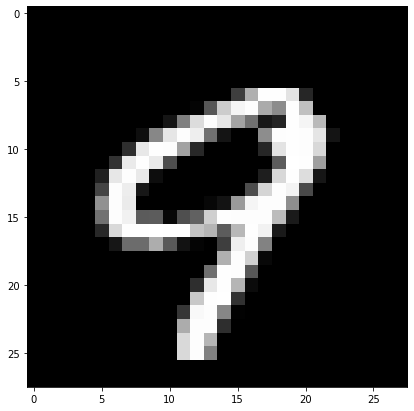

9


In [3]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 100

grid_data = d.iloc[idx].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, cmap = "gray")
plt.show()

print(l[idx])

### 3. 2D visualization using PCA (Calculated by hand)

Calculation by hand requires us to
1. Create a covariance matrix
2. Find the top two Eigen Values and corresponding Eigen Vectors
3. Apply the Eigen Vectors on the dataframe

Geometric representation of Eigen Values and Eigen Vectors are linked here :
https://drive.google.com/open?id=1erMTH5zid8OVQSiBUR-HDCQLg3D1U7Qi

In [4]:
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of 42K data-points.

labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)

the shape of sample data =  (15000, 784)


### Standardization
Standard Scaling allows us to distribute the entire dataset features normally. 
Meaning the mean is 0 and standard deviation is 1.

This is calculated by, *(Xi - Mean of Column)/(Std Dev of Column)*

Which also means in the normally distributed plot we have the 68% points within -1 to 1. And 95% points within -2 to 2.

Geometric representation of Standardizing the data is linked here : https://drive.google.com/open?id=1DzBRPwAMihCaO5sGVO7BE4AL31FIcjcy

In [5]:
# Data-preprocessing: Standardizing the data
# (x_i - mu_i)/sigma_i
# fit_transform - Fit to data, then transform it.

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [6]:
# find the co-variance matrix which is : A^T * A, here A^T is sample_data.T which is 784 x 15k, and A is 15k x 784.
# resultant matrix is 784 x 784
# Covariance matrix explains the realtionship between the variables
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of covariance matrix = ", covar_matrix.shape)

The shape of covariance matrix =  (784, 784)


In [9]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen values = ", values.shape)
print(values)
print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen values =  (2,)
[435532.55785282 605719.29173629]
Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [8]:
# projecting the original data sample on the plane 
# formed by two principal eigen vectors by vector-vector multiplication.
# we are taking 784 dataset and project it into top two dimensions, so we need top 2 eigen values
# new_coordinates will have the calculated eigen values applied on sample_data

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [9]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


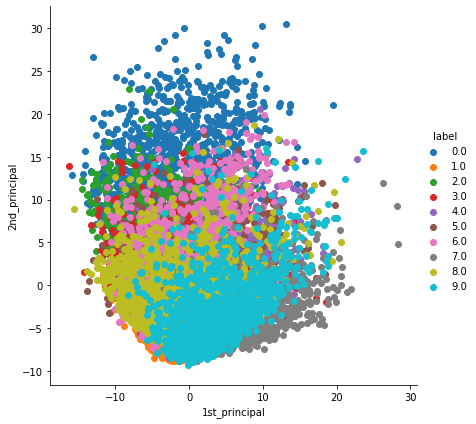

In [10]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### 4. 2D visualization using PCA (using Scikit-Learn)

In [11]:
# initializing the pca
# Linear dimensionality reduction using Singular Value Decomposition of the data
# to project it to a lower dimensional space.
from sklearn import decomposition
pca = decomposition.PCA()

In [12]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
# sample_data is standardized above
pca_data = pca.fit_transform(sample_data)

print("shape of pca_data = ", pca_data.shape)
print("shape of labels = ", labels.shape)

shape of pca_data =  (15000, 2)
shape of labels =  (15000,)


before stacking with labels  (15000, 2)
after stacking with labels  (15000, 3)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


       1st_principal  2nd_principal  label
0          -5.043532      -5.558404    1.0
1          19.305292       6.193933    0.0
2          -7.678804      -1.909985    1.0
3          -0.464858       5.524898    4.0
4          26.644298       6.366731    0.0
...              ...            ...    ...
14995      -4.758978       3.139486    1.0
14996      -1.314219       1.946421    4.0
14997      -1.507250      -2.147267    8.0
14998      -6.537304       3.204065    9.0
14999      -1.256246      -6.879045    6.0

[15000 rows x 3 columns]


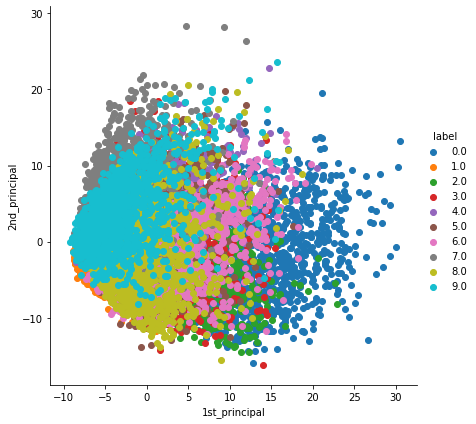

In [13]:
# attaching the label for each 2-d data point 
# np.vstack - Stack arrays in sequence vertically (row wise).
print("before stacking with labels ", pca_data.shape)
pca_data = np.vstack((pca_data.T, labels)).T
print("after stacking with labels ",pca_data.shape)
# creating a new data from which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
print(pca_df)
plt.show()

### 5. Explained Variance calculation

Explained variance during dimensionality reduction is nothing but the variance preserved while we reduce the D dimensions into D' dimensions. If you see the point at 200 in the x-axis, and mark it with the Y axis, we can see that almost 90% variance is explained while reducing 584 dimensions.

D=784

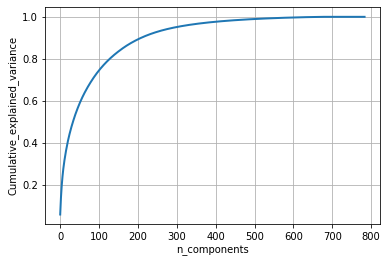

In [14]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

# Percentage variance explained = Lambda(i)/Summation of Lambda(i) i from 0 to 784

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

PCA does a poor job in dimensionality reduction wherein it does not show some labels altogether in the graph. This is because of the limitations in the algorithm. 

Graphical representation for the idea behind the limitation is linked here : https://drive.google.com/open?id=1Z_9sVRdugMVOpREZw4kwguR3edNTmgPl

### 6. 2D visualization using T-SNE

T Distributed Stochastic Neighbourhood Embedding explains the dimensionality reduction from D to D' using neighbourhood embedding technique. It tries to preserve the neighbours using the user defined perplexity and does not account the points which are not in the neighbourhood. 

Visual representation of the same is linked here: https://drive.google.com/open?id=1rFgF6jj1ajXfTw75SSDbI9XVaP3Ht83q

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


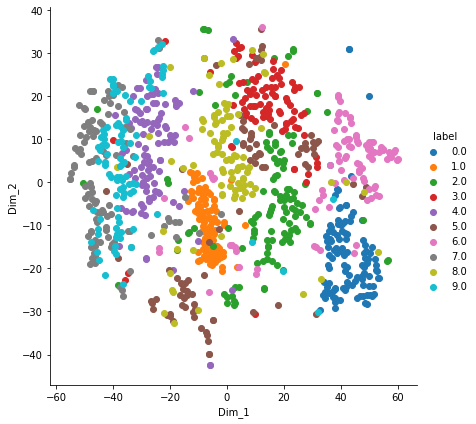

In [15]:
# TSNE

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components/axes = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### 7. Play with perplexity and n_iter

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


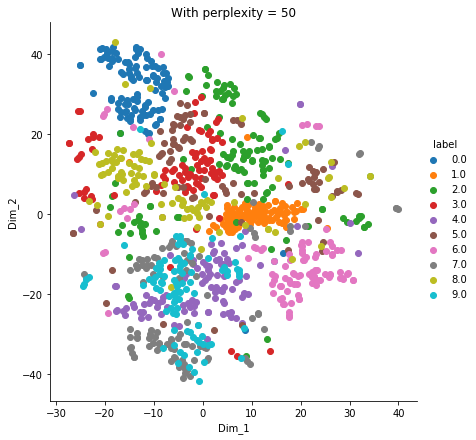

In [16]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
# perplexity is the number of points we wish to preserve
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


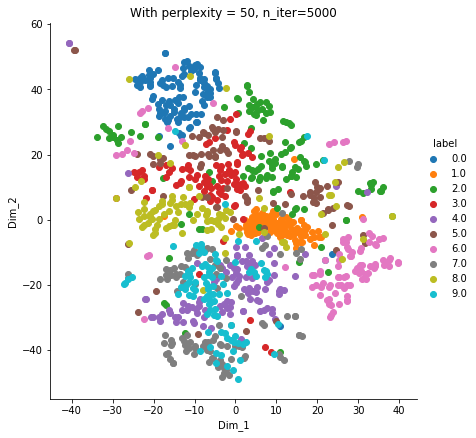

In [17]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


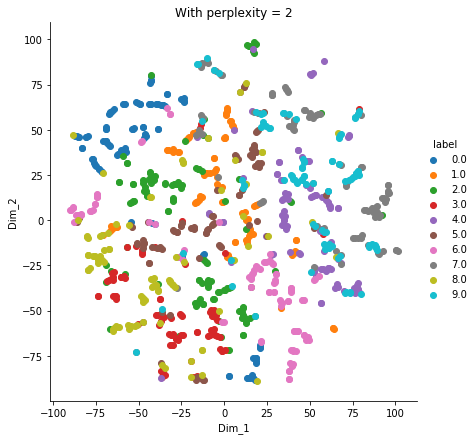

In [18]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

## 8. Conclusion 

Our T-SNE model as shown gives us a better data visualization than the PCA model. 

Reason behind this is T-SNE preserves the distance between the neighbourhood points effectively and embeds it in D' dimension.

There is a limitation for T-SNE where it cannot solve the crowding problem. 

Linked here : 
https://drive.google.com/open?id=1mDwZ7rmtU9XfQqv46GZTjCCDthNM7NM6 and here 
https://drive.google.com/open?id=1q0CwDfOs3u2PR0uAFdBHSRhjqU1sYOGo

In [19]:
# Run the same analysis using 42K points with various values of perplexity and iterations.

# If you use all of the points, you can expect plots like this blog below:
# http://colah.github.io/posts/2014-10-Visualizing-MNIST/